# Plots and subplots with matplotlib and pandas

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# creating an independent variable, from 0 to 1 with 100 points
x = np.linspace(0,1,100)
# consider the function y: f(x)=x**2
y = x**2
# adding all into a dataframe
df = pd.DataFrame({"ind":x, "dep":y})

Text(0.5, 1.0, 'dependent is the square of independent')

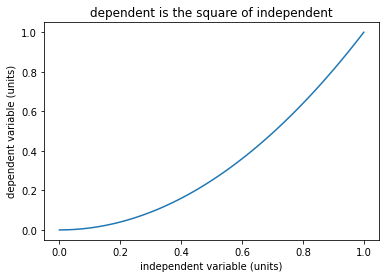

In [9]:
## Ploting using directly matplotlib - pyplot libray
# - lazy, but quick for just one plot
plt.plot(df["ind"],df["dep"]);
plt.xlabel("independent variable (units)")
plt.ylabel("dependent variable (units)");
plt.title("dependent is the square of independent")

Text(0.5, 1.0, 'dependent is the square of independent')

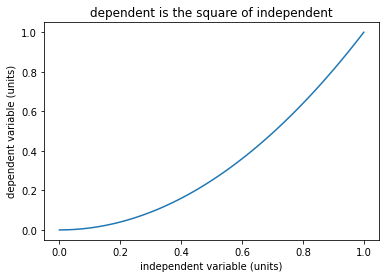

In [10]:
## Ploting using directly matplotlib - pyplot libray
## BUT -> first we initialize the figure and subplot:
fig, sp = plt.subplots(1,1)
sp.plot(df["ind"],df["dep"]);
sp.set_xlabel("independent variable (units)")
sp.set_ylabel("dependent variable (units)");
sp.set_title("dependent is the square of independent")

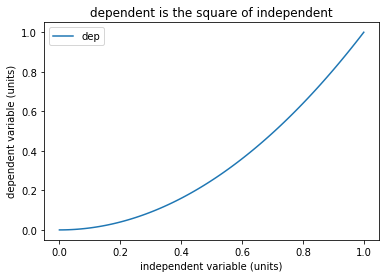

In [13]:
## Ploting using pandas 
fig, sp = plt.subplots(1,1)
df.plot(x="ind",y="dep",ax = sp); #there is an extra argument -> ax, to which we assign sp
sp.set_xlabel("independent variable (units)")
sp.set_ylabel("dependent variable (units)");
sp.set_title("dependent is the square of independent");

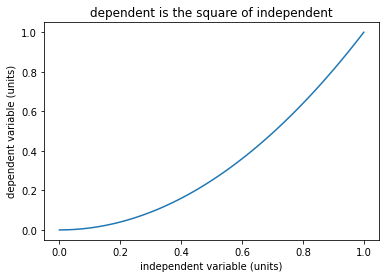

In [20]:
## Ploting using seaborn
fig, sp = plt.subplots(1,1)
sns.lineplot(x="ind",y="dep",data=df, ax=sp); #there is an extra argument -> data
sp.set_xlabel("independent variable (units)")
sp.set_ylabel("dependent variable (units)");
sp.set_title("dependent is the square of independent");

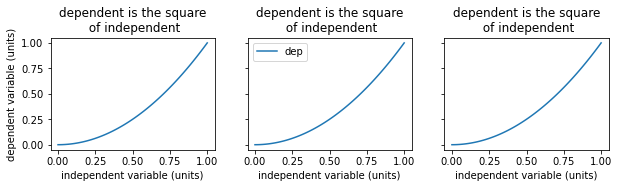

In [34]:
## Ploting multiple plots, side by side
fig, sp = plt.subplots(1,3,sharey=True,figsize=(10,(10/3)*0.618))
#seaborn
sns.lineplot(x="ind",y="dep",data=df, ax=sp[0]);
sp[0].set_xlabel("independent variable (units)")
sp[0].set_ylabel("dependent variable (units)");
sp[0].set_title("dependent is the square\n of independent");
#pandas
df.plot(x="ind",y="dep", ax=sp[1]);
sp[1].set_xlabel("independent variable (units)")
sp[1].set_ylabel("dependent variable (units)");
sp[1].set_title("dependent is the square\n of independent");
#matplotlib pyplot
plt.plot(df["ind"],df["dep"]);
sp[2].set_xlabel("independent variable (units)")
sp[2].set_ylabel("dependent variable (units)");
sp[2].set_title("dependent is the square\n of independent");

# Plots we have covered so far

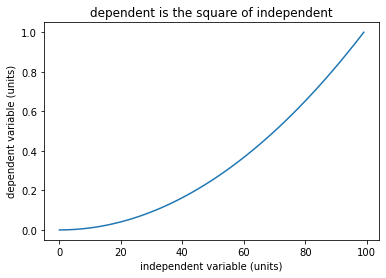

In [176]:
# line plots
plt.plot(df["dep"])
plt.xlabel("independent variable (units)")
plt.ylabel("dependent variable (units)");
plt.title("dependent is the square of independent");

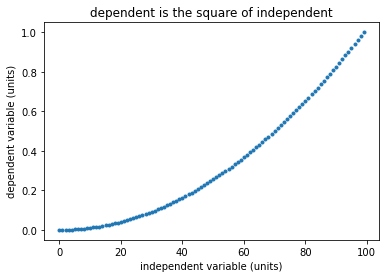

In [175]:
# dot plots
plt.plot(df["dep"], ".");
plt.xlabel("independent variable (units)")
plt.ylabel("dependent variable (units)");
plt.title("dependent is the square of independent");

Text(0.5, 1.0, 'distribution not realy interesting')

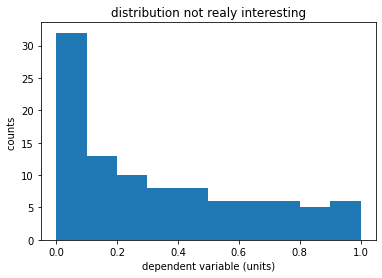

In [159]:
# histograms
fig,sp = plt.subplots(1,1)
df.dep.plot(kind= "hist")
sp.set_xlabel("dependent variable (units)")
sp.set_ylabel("counts ");
sp.set_title("distribution not realy interesting")

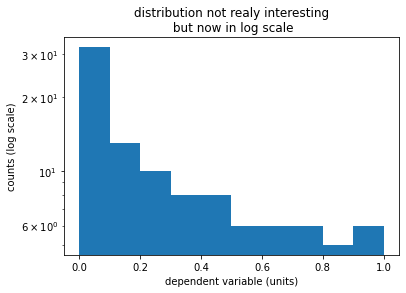

In [162]:
#log plot
fig,sp = plt.subplots(1,1)
df.dep.plot(kind= "hist")
plt.yscale('log', nonpositive='clip');
sp.set_ylabel("counts (log scale)")
sp.set_xlabel("dependent variable (units)");
sp.set_title("distribution not realy interesting\n but now in log scale");

Text(0.5, 1.0, 'Bins that actually represent percentages')

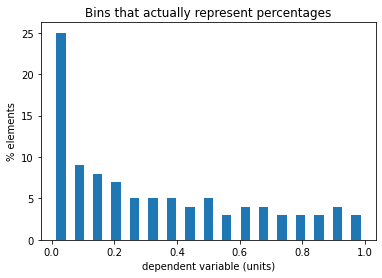

In [164]:
# computing the actual distribution:
n, bins = np.histogram(df["dep"], bins = 17)
dens = n/n.sum()
plt.bar(x=(bins[1:]+bins[:-1])/2, height=100*dens, width=0.03)
plt.xlabel("dependent variable (units)")
plt.ylabel("% elements");
plt.title("Bins that actually represent percentages")

Text(0.5, 1.0, 'Densities can be misleading!')

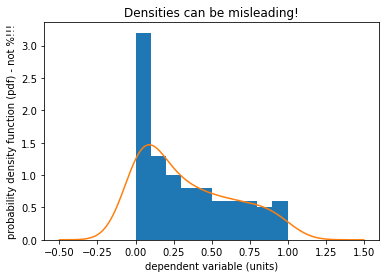

In [174]:
# kdes and densities -> be careful when using
fig,sp = plt.subplots(1,1)
df.dep.plot(kind= "hist", density=True)
df.dep.plot(kind= "kde")
sp.set_xlabel("dependent variable (units)")
sp.set_ylabel("probability density function (pdf) - not %!!!");
sp.set_title("Densities can be misleading!")

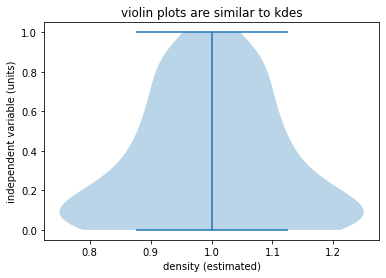

In [147]:
# log violinplot
plt.violinplot(df["dep"]);
plt.xlabel("density (estimated)")
plt.ylabel("independent variable (units)")
plt.title("violin plots are similar to kdes");

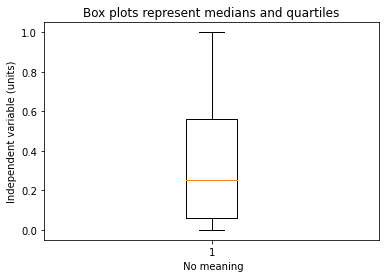

In [150]:
# log boxplot
plt.boxplot(df["dep"]);
plt.xlabel(" No meaning")
plt.ylabel("Independent variable (units)")
plt.title("Box plots represent medians and quartiles");

In [125]:
df_cat = pd.DataFrame({"num_1":[0,1,2,3,4,4,3,6],
                       "cat_1":["val_1","val_1","val_2","val_2","val_2", "val_1","val_2","val_1"], 
                       "cat_2":["oth_1","oth_2","oth_3","oth_3","oth_1","oth_2","oth_2","oth_3"],
                       "bool_1":[True,False, False, True, True,False,False,True]
                      })

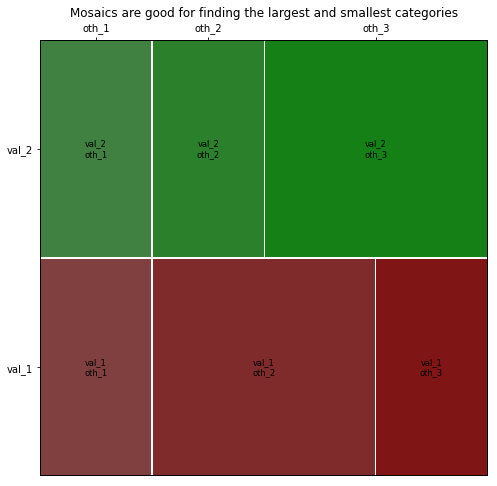

In [137]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
mosaic(df_cat, ['cat_1', 'cat_2'], horizontal=False, ax=ax);
ax.set_title("Mosaics are good for finding the largest and smallest categories");

In [127]:
df_count = df_cat.pivot_table(columns="cat_2", index="cat_1", values="num_1", aggfunc="count")

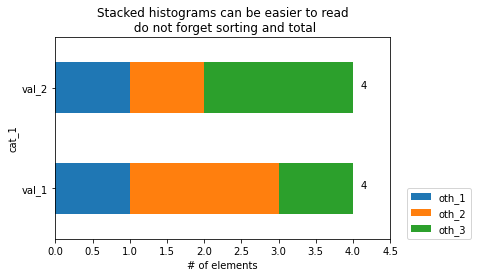

In [141]:
fig, ax = plt.subplots(1,1,figsize=(6,6*0.618))
df_count.plot( kind="barh",stacked=True, ax=ax)
ax.set_xlabel("# of elements")
ax.set_xlim((0,4.5)) # resize the axis so that we have space for the numbers
ax.text(4.1,1,"4") #add text for val_2 total
ax.text(4.1,0,"4") #add text for val_1 total
ax.legend(loc=(1.05,0));
ax.set_title("Stacked histograms can be easier to read\n do not forget sorting and total");

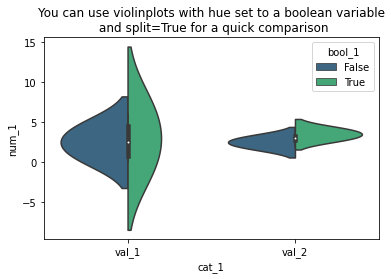

In [139]:
fig,ax = plt.subplots(figsize=(6,6*0.618))
sns.violinplot(x="cat_1", y="num_1", hue="bool_1",
               data=df_cat, palette="viridis", split=True, bw=1, ax=ax);
ax.set_title("You can use violinplots with hue set to a boolean variable\n and split=True for a quick comparison");

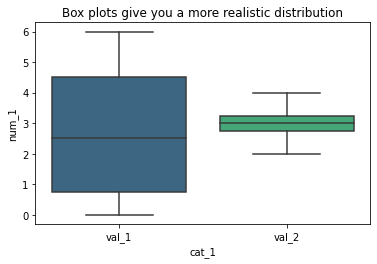

In [140]:
fig,ax = plt.subplots(figsize=(6,6*0.618))
sns.boxplot(x="cat_1", y="num_1",
               data=df_cat, palette="viridis", ax=ax);
ax.set_title("Box plots give you a more realistic distribution");